# **Menginstall Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Mengunduh Data**

In [56]:
data_path = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/refs/heads/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(data_path)

further infos: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

penjelasan dataset

# **Memahami & Menilai Data**

Check data summary

In [10]:
# shape dari data
df.shape

(7043, 21)

In [11]:
# 5 baris pertama data
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
# menghitung missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
# deskripsi statistik data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print(f'banyaknya data yang terduplikasi: {df.duplicated().sum()}')

banyaknya data yang terduplikasi: 0


Ada kemungkinan salah penulisan atau double writting dengan makna yang sama, seperti: yes, Yess, Yes, sehingga perlu memastikan unique values yang ada.

In [23]:
# cek incorrect values
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts(dropna=False))
    print("-" * 20)

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
--------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
--------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
--------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
--------------------
OnlineBackup
No   

## **Insights**:

#### **1. Data Types & Non-null Counts:**
* Dataset berisi **7043** baris dan **21** kolom.
* **Data types**: Terdapat 18 kolom dengan tipe data `object`, 2 kolom dengan tipe data `int64`, dan 1 kolom dengan tipe data `float64`.
     * **Numerical Features**: Features yang termasuk adalah `tenure` dan `MonthlyCharges`.
     * **Categorical Features**: Features yang termasuk adalah `Partner`, `gender`, etc.

#### **2. Summary Statistics:**
* **Categorical Data**: 
     * terdapat 2/3 data unique
* **Numerical Data**: 
     * `tenure` memiliki rata-rata sebesar `32.37` atau setara 32 hari dari range berlangganan `0` hingga `72` hari. Hal ini menunjukkan sebagian besar pelanggan berhenti lebih awal, yang mengindikasikan perusahaan saat ini belum bisa menjaga hubungan jangka panjang dengan pelanggan dan ini bisa menjadi indikator adanya ketidakpuasan terhadap layanan yang diberikan. 
     * `MonthlyCharges` memiliki rata-rata sebesar `$64.76` dengan standar deviasi sebesar `$30.09`, mengindikasikan variasi harga pembayaran bulanan antar pelanggan yang beragam. Rentang transaksi bulanan minimal `$18.25` dan maksimal `$118.75`, menunjukkan perbedaan yang sangat signifikan dalam transaksi dan terdapat tendensi untuk memaksimalkan penggunaan layanan yang disediakan oleh perusahaan kepada pelanggan.

#### **3. Missing Values Summary:**
* Untuk saat ini tidak terdapat kolom yang berisi missing values.

#### **4. Duplicate & Unique Values Summary:**
* Dari `df.duplicated()`, unique values, dan `df.head()` tidak terlihat ada data yang terduplikasi.
* `customerID` tidak diperlukan untuk proses modeling.
* `TotalCharges` tidak tepat menggunakan tipe data object.
* Tidak ada unique values yang berasal dari salah penulisan atau double writting.

#### **Masalah yang Bisa Diselesaikan:**
* Penulisan nama kolom tidak konsisten, seperti: lower case, diawali huruf kecil/kapital, dan camel case.
* Penulisan kapitalisasi data dalam setiap baris tidak konsisten dan nama kolom juga, sehingga bisa diubah menjadi lower case semua.
* Kolom `SeniorCitizen` berisi data kategorikal apakah seseorang merupakan warga lanjut usia atau tidak dan bukan data untuk perhitungan matematis jadi data type-nya bisa diubah dari `int64` menjadi `object`.
* Kolom `TotalCharges` berisi data numerik kontinu sehingga data type-nya perlu diubah, dari `object` menjadi `float64`.


# **Data Cleaning**

#### Column Renaming & Data Consistency

Penamaan kolom tidak konsisten sehingga perlu dirubah agar konsisten dan sesuai standar.

In [57]:
df.columns = df.columns.str.lower()

Data dalam setiap baris memiliki format penulisan yang tidak konsisten sehingga perlu diubah juga.

In [58]:
categorical_columns = list(df.columns[df.dtypes == 'object'])

In [59]:
for col in categorical_columns:
     df[col] = df[col].str.lower()

#### Correcting Data Type 

Mengubah tipe data yang tidak sesuai dalam setiap kolom dalam dataset.

In [76]:
df.seniorcitizen = df.seniorcitizen.astype('category')

**Insight**:
* Kolom `seniorcitizen` meskipun datanya berupa angka atau numerik yaitu 0 dan 1, tetapi kolom ini berisi data kategorik nomina yang menjelaskan apakah seorang pelanggan lansia atau tidak sehingga datanya diubah dari `int64` menjadi `category`.

In [62]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

**Insights:**
* mengubah tipe data object menjadi numerik yang sesuai, dalam konteks kolom ini maka tipe data berubah dari `object` menjadi `float64`.
* `errors='coerce'` nilai yang tidak valid atau tidak dapat diubah ke tipe data numerik akan otomatis digantikan dengan `NaN`.
* Sebelumnya missing values ada 0, sebagai akibat menggunakan parameter `errors='coerce'` maka saat ini akan ada kemungkinan adanya missing values di kolom `totalcharges`.

#### Handling Missing Values

menangani missing values

In [63]:
df.isna().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [64]:
df[df.totalcharges.isna()].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerid,4472-lvygi,3115-czmzd,5709-lvoeq,4367-nuyao,1371-dwpaz,7644-omvmy,3213-vvolg,2520-sgtta,2923-arzlg,4075-wkniu,2775-sefee
gender,female,male,female,male,female,male,male,female,male,female,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,0
partner,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no
dependents,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
tenure,0,0,0,0,0,0,0,0,0,0,0
phoneservice,no,yes,yes,yes,no,yes,yes,yes,yes,yes,yes
multiplelines,no phone service,no,no,yes,no phone service,no,yes,no,no,yes,yes
internetservice,dsl,no,dsl,no,dsl,no,no,no,no,dsl,dsl
onlinesecurity,yes,no internet service,yes,no internet service,yes,no internet service,no internet service,no internet service,no internet service,no,yes


In [65]:
missing_ratio = (df['totalcharges'].isna().sum() / len(df)) * 100
print(f"Missing ratio: {missing_ratio:.2f}%")

Missing ratio: 0.16%


**Insights**:
* Terdapat missing values di kolom `totalcharges` sebanyak 11.
* Terlihat data yang memiliki missing values bernilai `no` di kolom `churn` yang artinya pelanggan tidak memiliki kecenderungan atau karakteristik untuk berhenti.
* Meskipun pelanggan tidak churn, untuk menentukan langkah selanjutnya (di-drop atau dipertahankan), perlu memperhatikan beberapa hal:
     * Kolom `monthlycharges` sudah berisi harga tagihan bulanan.
     * Namun, semua kolom `tenure` berisi angka `0`, hal ini mengindikasikan bahwa 11 orang ini adalah pelanggan baru.
     * Data dari pelanggan baru tidak memiliki kontribusi yang signifikan dalam model dan belum memiliki pola historis yang cukup atau diperlukan. Selain itu, pelanggan baru saat hari pertama (ke-0) mungkin belum mengalami masalah yang sering kali menjadi pemicu churn (seperti masalah dengan layanan atau pengalaman pelanggan negatif).
     
* Proporsi missing values ini sangat kecil dibandingkan total data (11 dari 7043), yaitu sekitar 0.16%

**Conlusion**: 11 data ini bisa di-drop karena tidak berkontribusi signifikan untuk model.

In [66]:
# drop missing values
df = df.dropna(subset=['totalcharges'])

In [95]:
df = df.drop(columns='customerid')

# **Exploratory Data Analysis**

menggunakan data yang merupakan hasil copy untuk di-transform sehingga data asli tetap terjaga keoriginalannya

In [96]:
eda_df = df.copy()

#### **Univariate Analysis**:

Univariate analysis dengan data kategorik

In [107]:
import warnings
warnings.filterwarnings("ignore")

In [97]:
categorical_columns = eda_df.select_dtypes(include=['object', 'category']).columns

In [121]:
def analyze_categorical(df: pd.DataFrame, categorical_columns):
    """Plots the distribution of categorical features in a grid layout."""

    n_features = len(categorical_columns)
    n_rows = (n_features + 6 - 1) // 6  
    fig, axes = plt.subplots(n_rows, 6, figsize=(20, 5 * n_rows), constrained_layout=True)  
    
    axes = axes.flatten()
    for i, feature in enumerate(categorical_columns):
        ax = axes[i]  
        sns.countplot(
            x=feature,
            data=df,
            palette="crest",
            order=df[feature].value_counts().index,
            ax=ax
        )
        ax.set_title(f"Distribution of {feature}")
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.tick_params(axis='x', rotation=45)
    
    # kosongkan axes yang tidak terpakai
    for i in range(n_features, len(axes)):
        fig.delaxes(axes[i])
    
    plt.show()

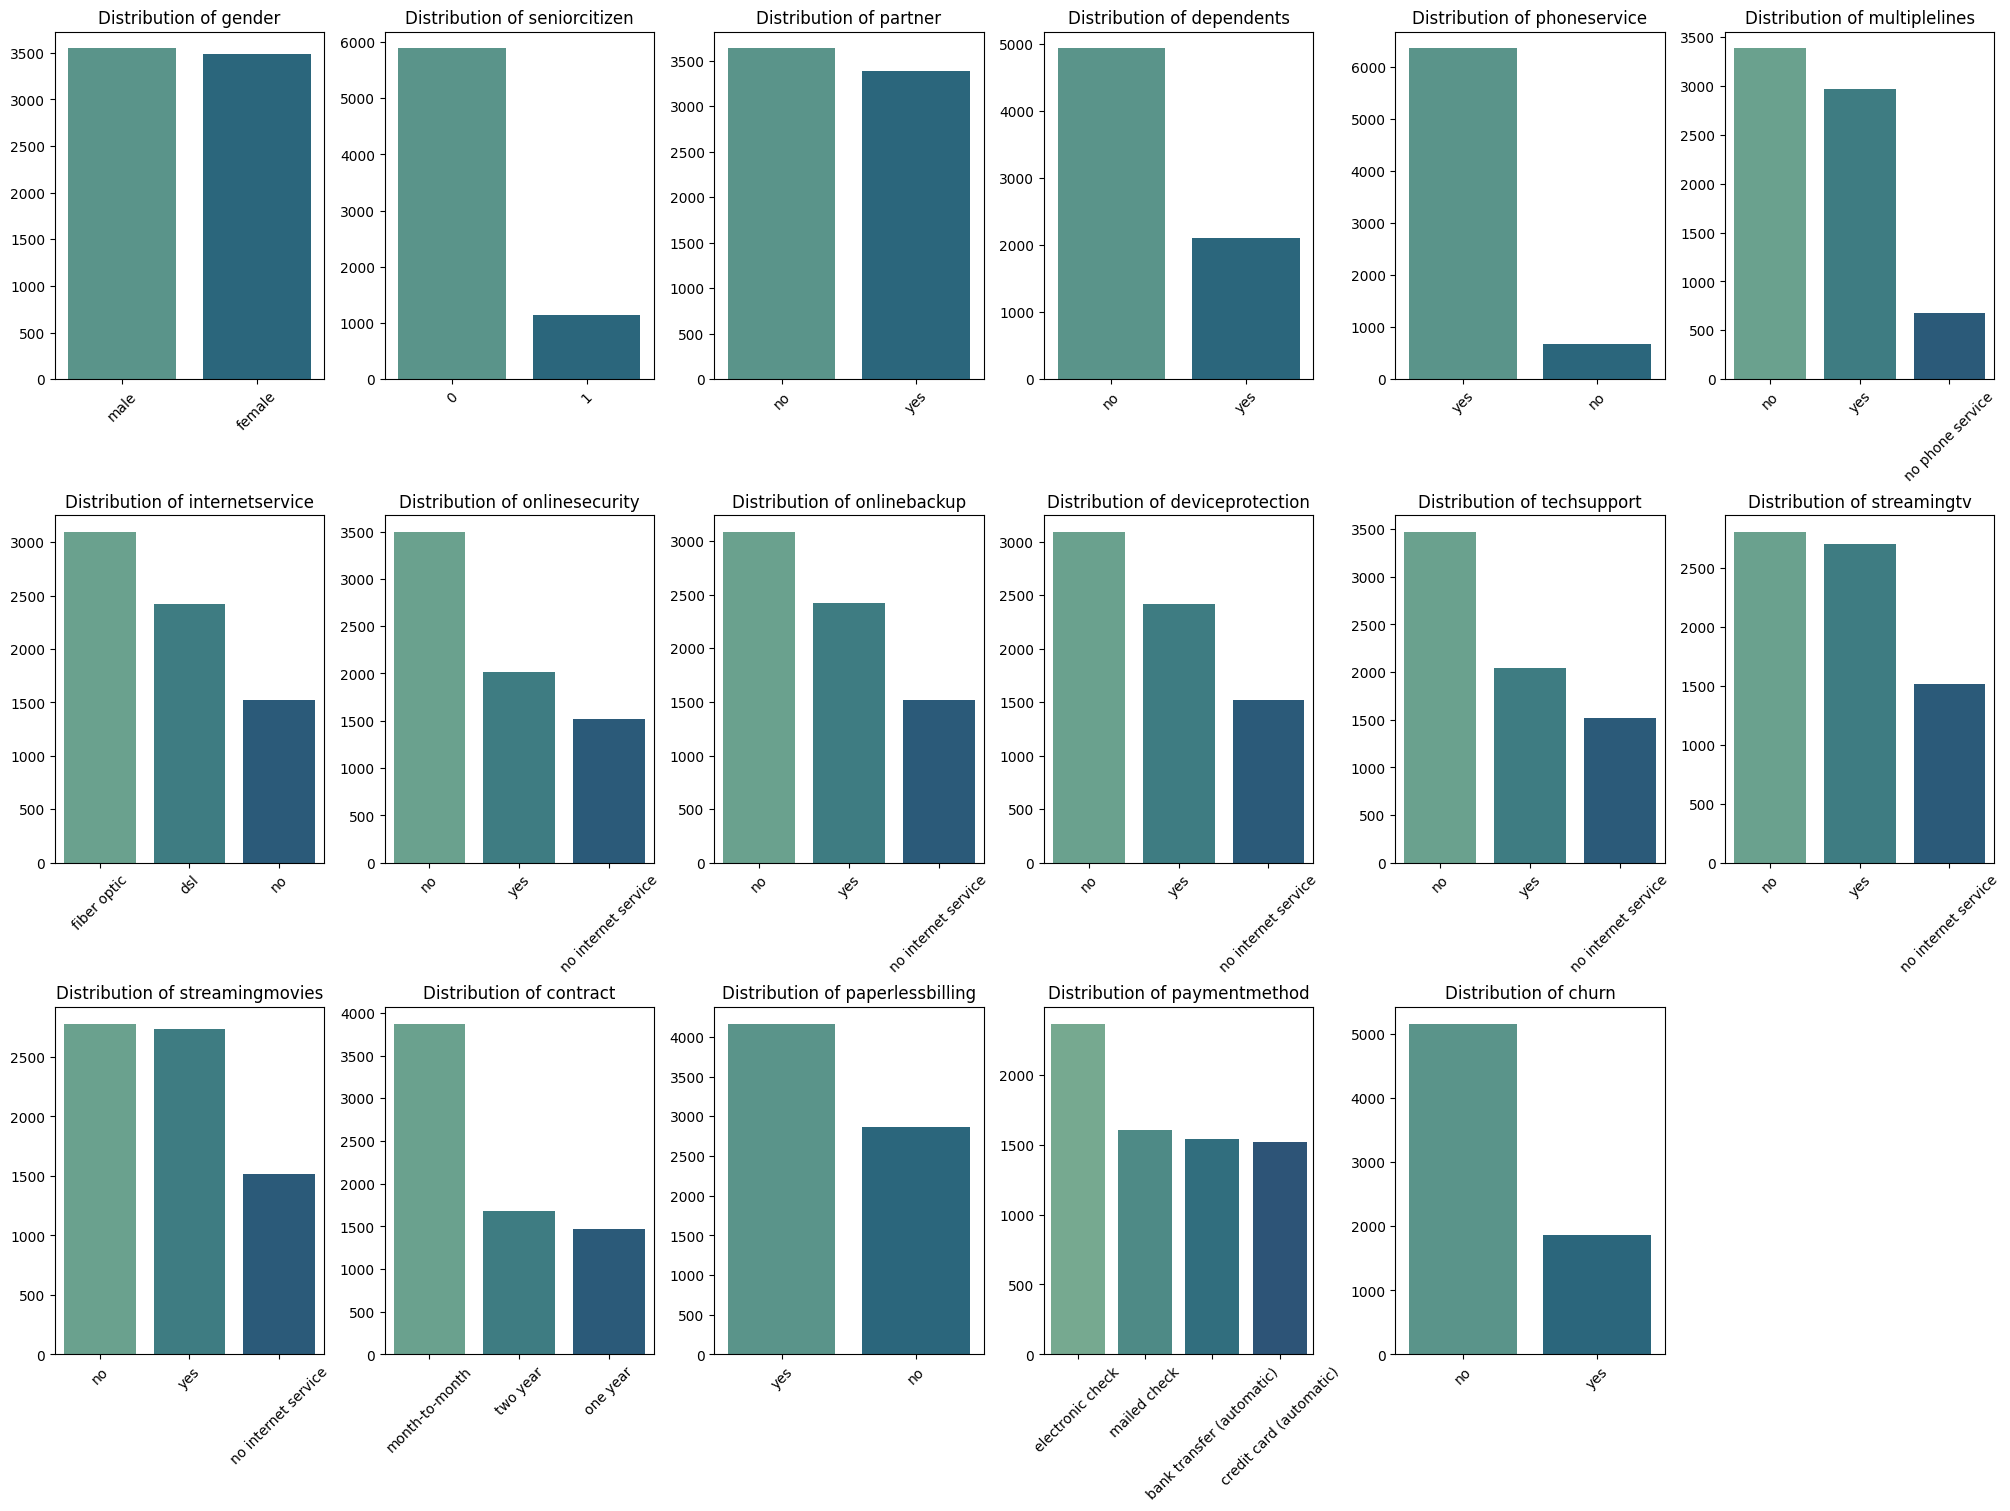

In [122]:
analyze_categorical(eda_df, categorical_columns)

**Insights**:
* 

Univariate analysis dengan data numerik

In [128]:
numerical_columns = eda_df.select_dtypes(exclude=['object', 'category']).columns

In [135]:
def analyze_numerical(df: pd.DataFrame, features):
     """Plots the distribution of a numerical feature using a histogram and KDE."""
     
     n_cols = 3 
     n_rows = (3 + n_cols - 1) // n_cols  
     plt.figure(figsize=(15, 5 * n_rows)) 
    
     for i, feature in enumerate(features):
        plt.subplot(n_rows, n_cols, i + 1) 
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
    
     plt.tight_layout()  
     plt.show()

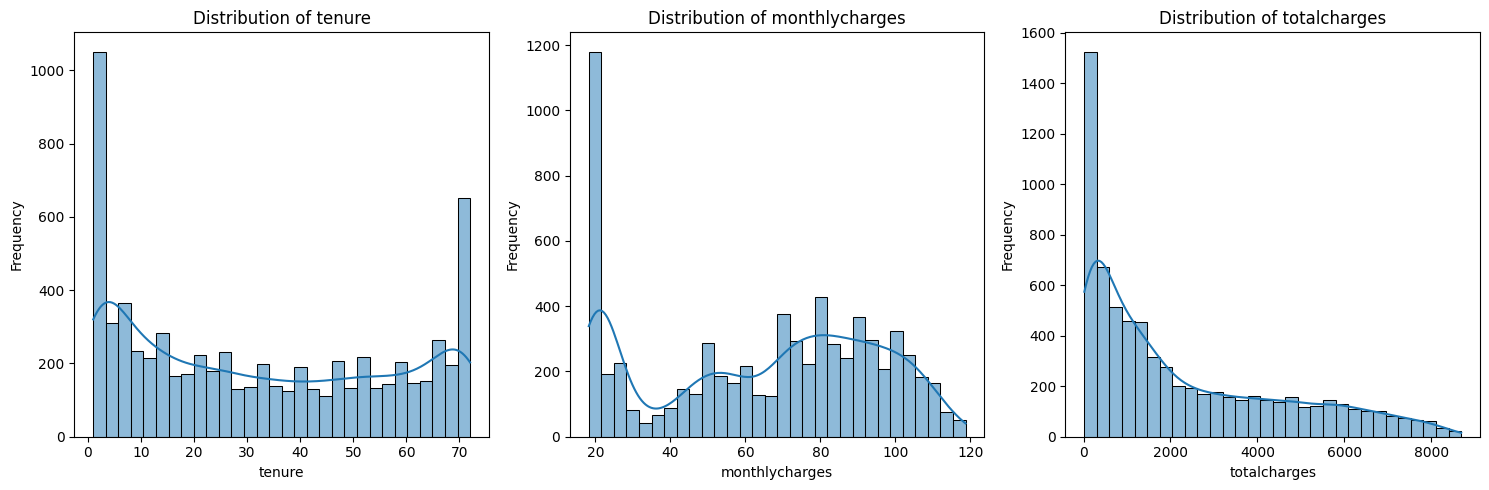

In [136]:
analyze_numerical(eda_df, numerical_columns)

tidak simetris

#### **Bivariate Analysis**:

Bivariate analysis dengan 2 data numerik

Bivariate analysis data numerik dan kategorik

#### **Multivariate Analysis**:

# **Data Preparation**

feature scaling

# **Modeling**

# **Evaluation**